In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing dataset

##mi = pd.read_csv("/Users/prathamesh/Desktop/Excelr-material/ML/Myocardial infarction complications.csv")
Data_Set= pd.read_csv("D:/Shiva Data Science/DS Projects/Project-01/Myocardial infarction complications.csv", encoding='utf-8')
Data_Set.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Dropping Column ID which is not important for our analysis.

Data_Set.drop(["ID"],axis=1,inplace=True)

In [4]:
print(list(Data_Set.columns)) 

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03',

In [5]:
Data_Set.shape 

(1700, 123)

In [6]:
Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [7]:
categorical = [var for var in Data_Set.columns if Data_Set[var].dtype=='O'] 
print('There are {} categorical variables\n'.format(len(categorical))) 

There are 0 categorical variables



In [8]:
Data_Set.duplicated().sum()
#There are no duplicate values present in dataset

0

In [9]:
Data_Set.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# EDA (Exploratory Data Analysis)

# Visualizations

Text(0.5, 1.0, 'Null Values Plot')

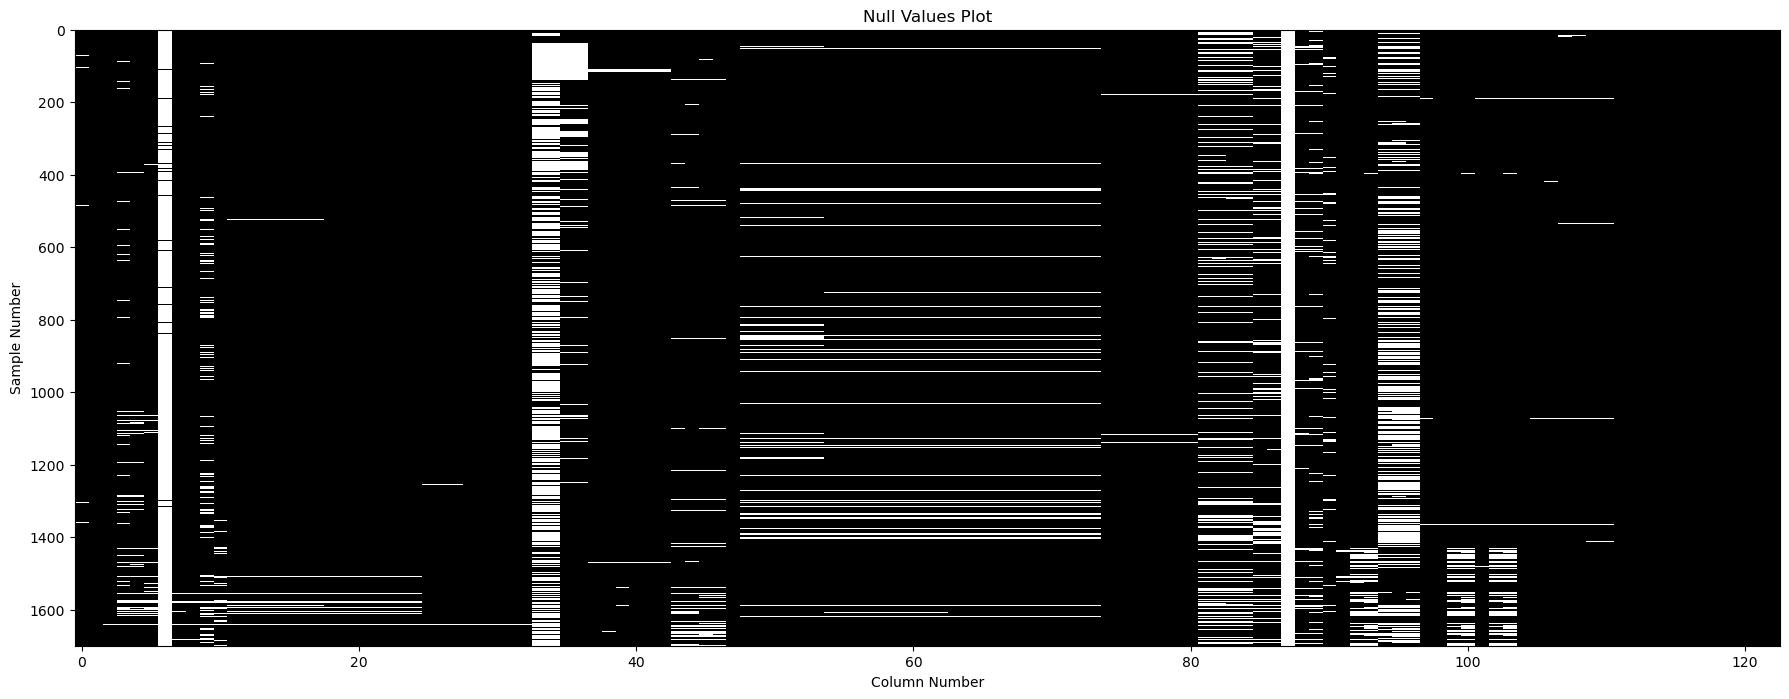

In [10]:
#Data set visualization(Null vs Values)

plt.figure(figsize=(22, 8))
plt.imshow(Data_Set.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title('Null Values Plot') 

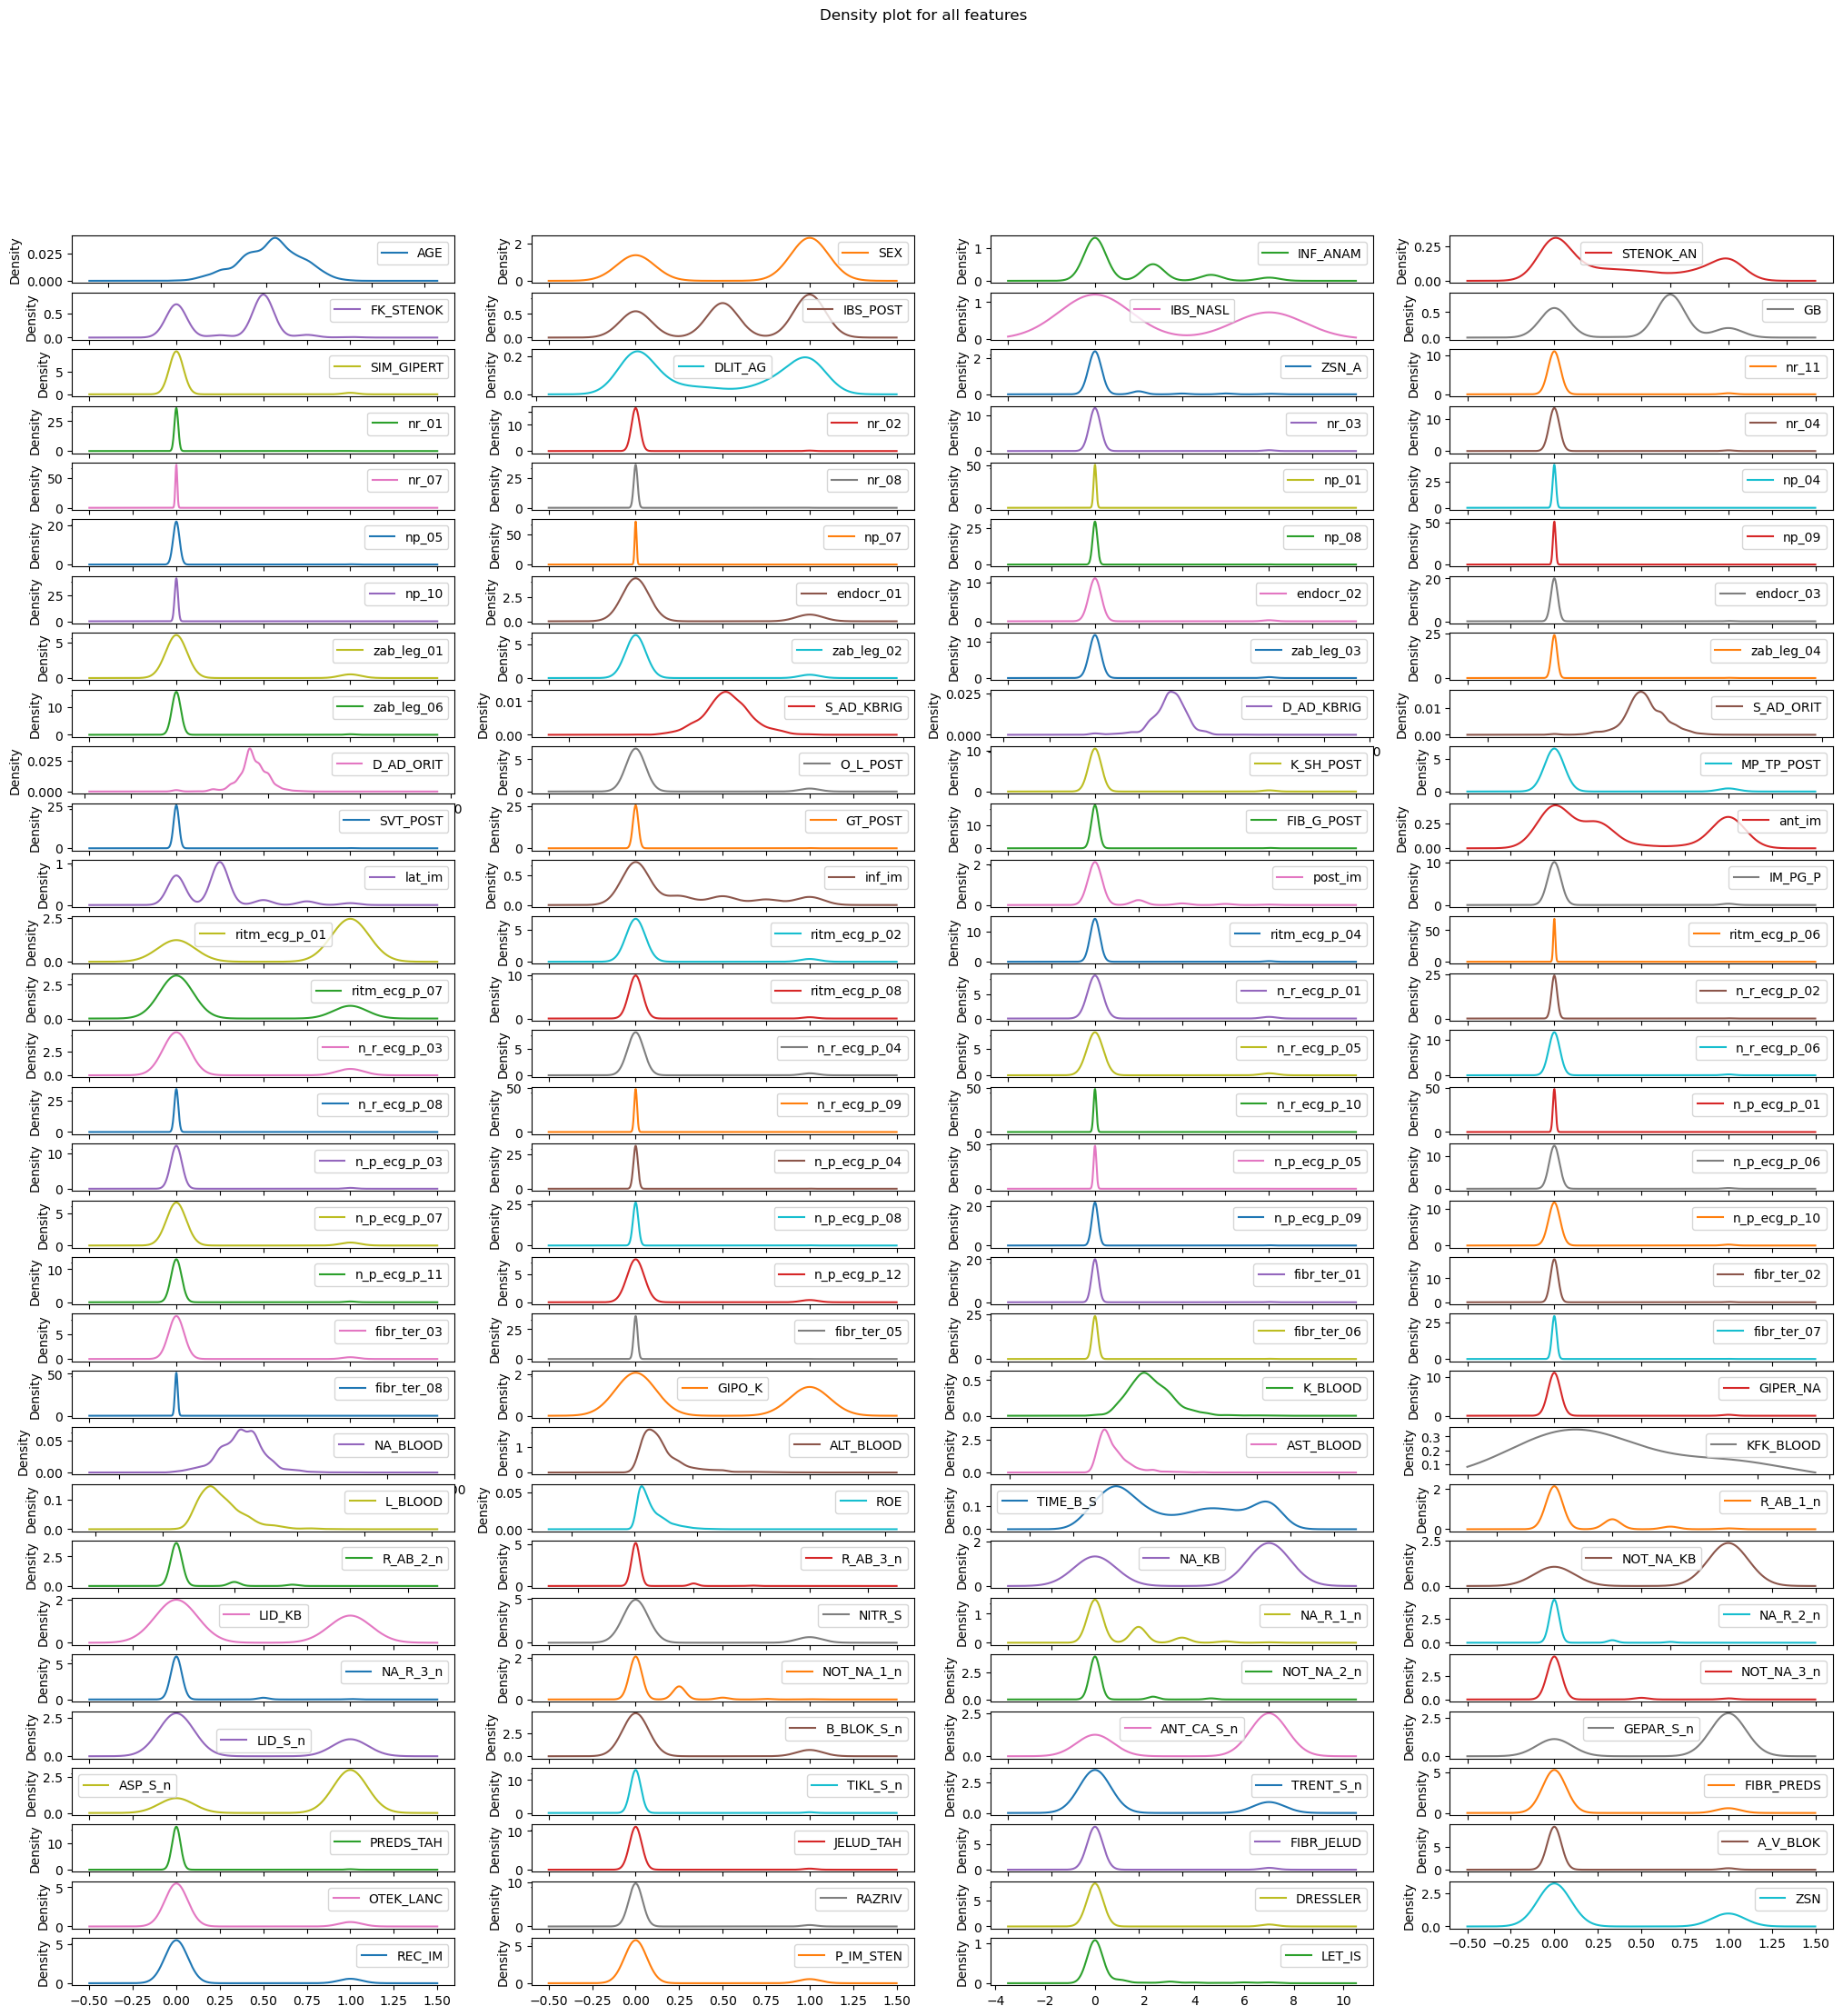

In [11]:
#Density plot for distribution
Data_Set.plot(kind='density',figsize=(25,25),subplots=True,layout=(31,4),title="Density plot for all features",sharex=False)
plt.show()

<Axes: ylabel='count'>

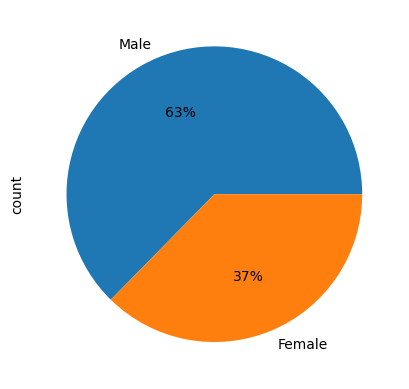

In [12]:
#1- Male, 0 -Female
mylabels=["Male","Female"]
Data_Set.SEX.value_counts().plot(kind="pie",labels = mylabels, autopct='%1.0f%%')

<Axes: xlabel='AGE', ylabel='Count'>

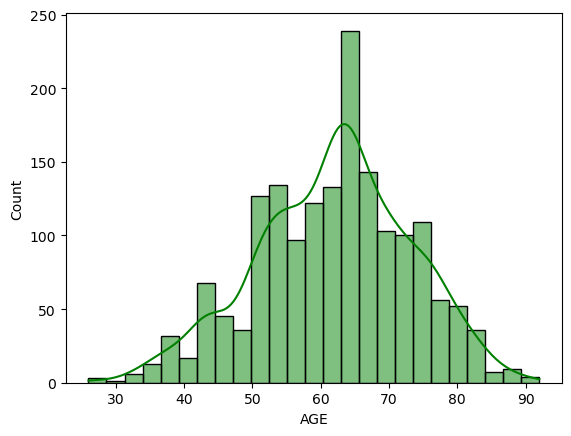

In [13]:
# Adding a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:
sns.histplot(Data_Set['AGE'],kde=True, color='Green')

<Axes: xlabel='LET_IS'>

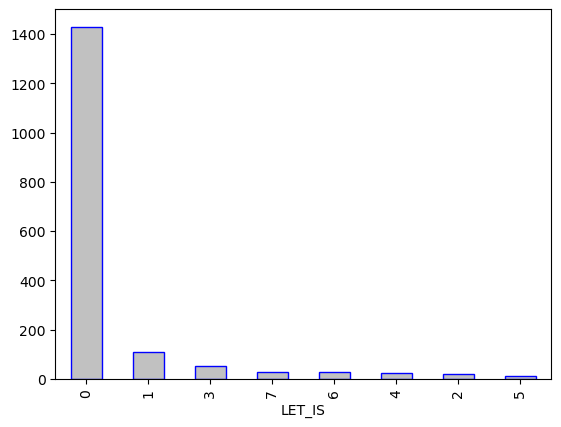

In [14]:
#Barplot for Lethal outcome (cause) (LET_IS)
Data_Set.LET_IS.value_counts().plot(kind='bar',color=(0.4, 0.4, 0.4, 0.4),  edgecolor='blue') 


#0: unknown (alive) 1429 84.06%
#1: cardiogenic shock 110 6.47%
#2: pulmonary edema 18 1.06%
#3: myocardial rupture 54 3.18%
#4: progress of congestive heart failure 23 1.35%
#5: thromboembolism 12 0.71%
#6: asystole 27 1.59%
#7: ventricular fibrillation 27 1.59%

<Axes: title={'center': 'Unique value counts per Variable'}>

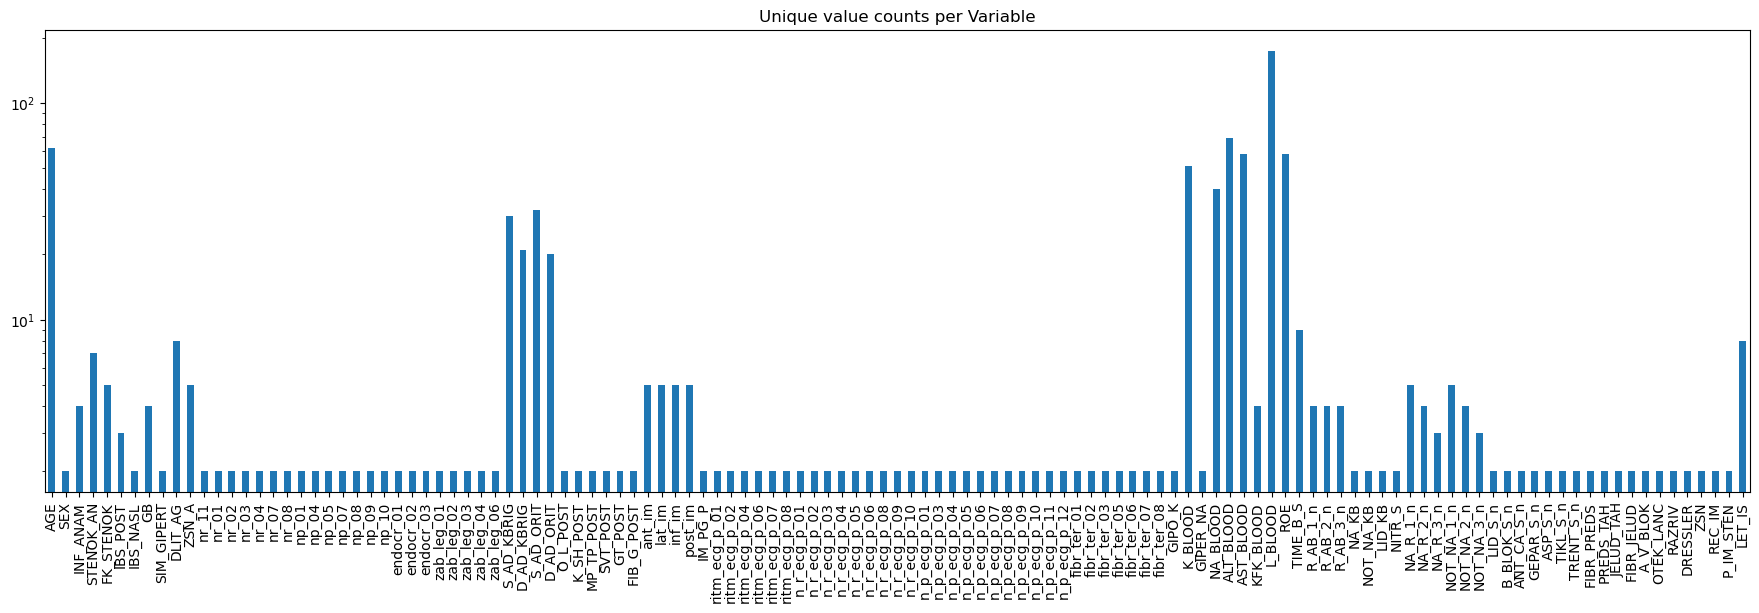

In [15]:
#Variable wise unique value count
unique_values = Data_Set.nunique()
unique_values.plot.bar(logy=True, figsize=(22, 6), title="Unique value counts per Variable")

<Axes: title={'center': 'Null values% per Variable'}>

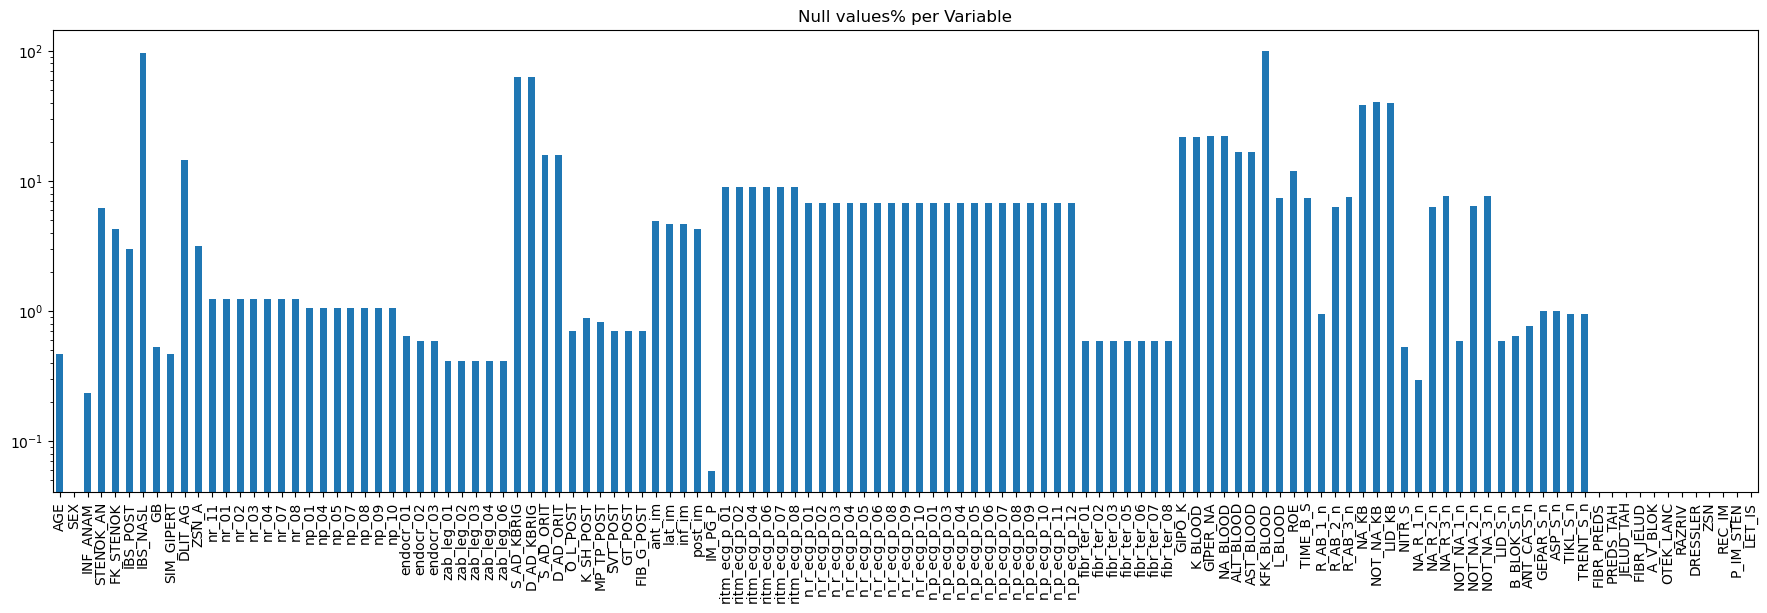

In [16]:
#Bar plot for null_percentage
null_percentage = Data_Set.isnull().sum()/len(Data_Set)
null_percentage
null_percentage1=null_percentage*100 
null_percentage1.plot.bar(logy=True, figsize=(22, 6), title="Null values% per Variable")

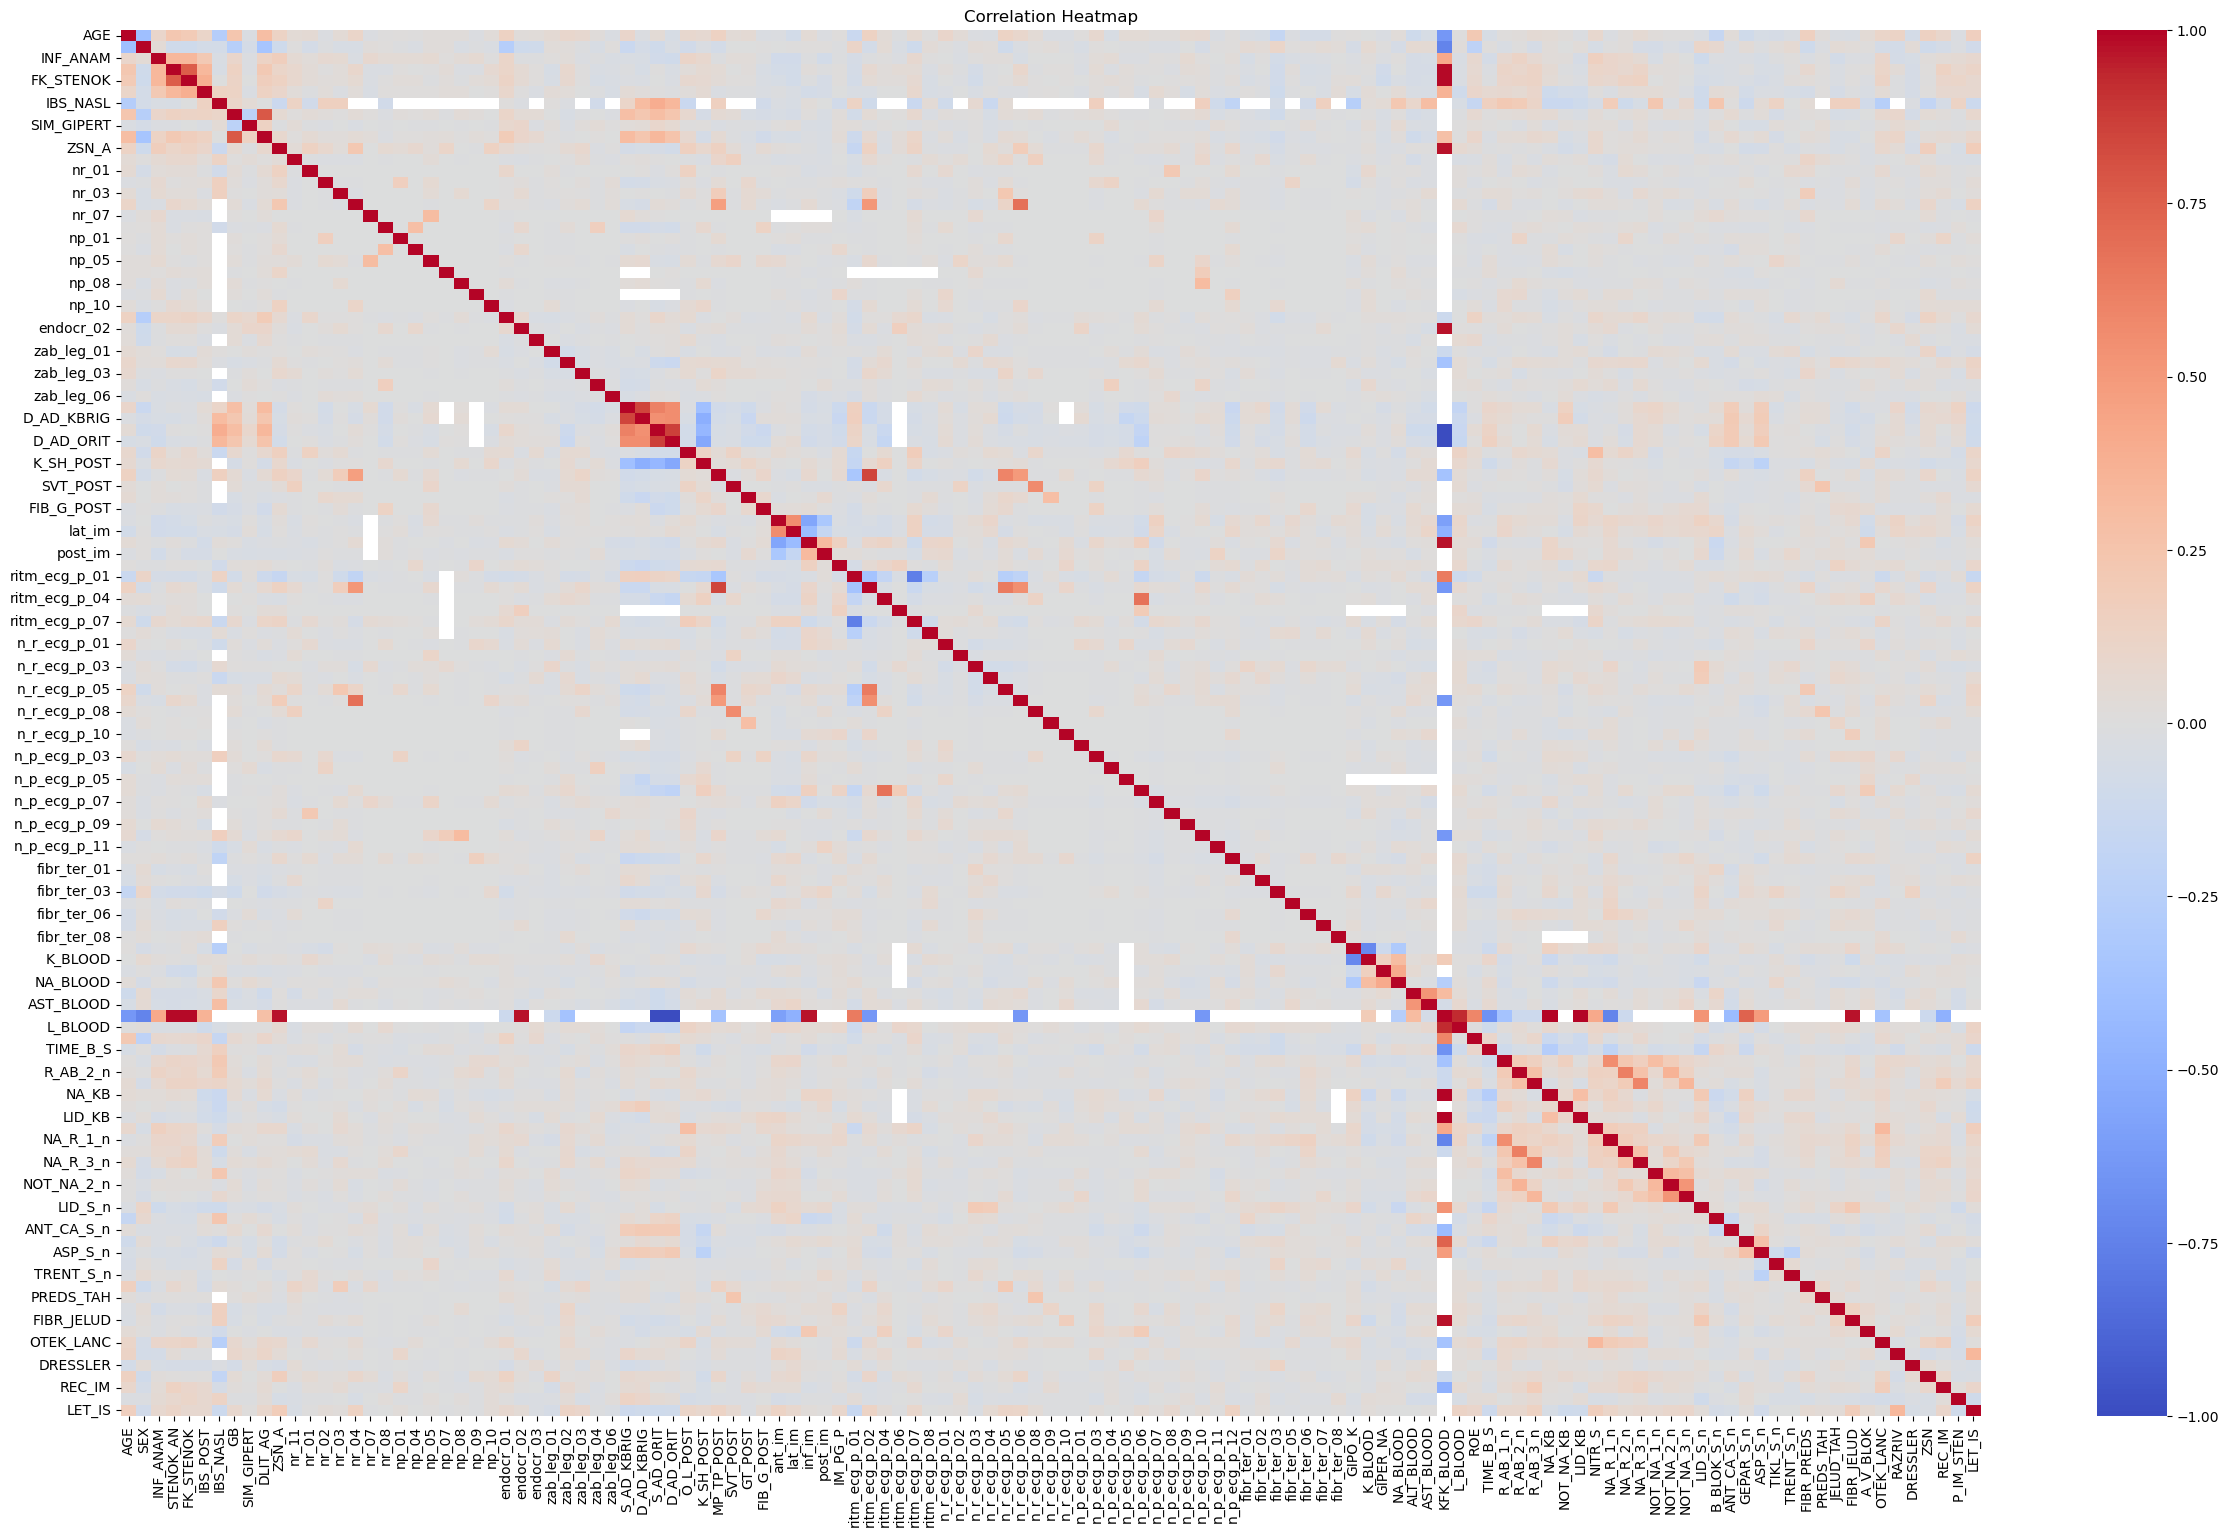

In [17]:
correlation = Data_Set.corr()    #Correlation between Variables

# Heat map to understand correlation visually
plt.figure(figsize=(30, 18))
sns.heatmap(correlation,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing

In [18]:
# Count of duplicate values

Data_Set.duplicated().sum()

0

In [19]:
# Datatype of variables

Data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [20]:
# Count and percentage of null values present in Variables.

for i in Data_Set.columns:
    if Data_Set[i].isnull().sum() > 0:
        print(i, "-->", Data_Set[i].isnull().sum() , "-->", int(np.round(Data_Set[i].isnull().sum()/len(Data_Set),2)*100),"%")

AGE --> 8 --> 0 %
INF_ANAM --> 4 --> 0 %
STENOK_AN --> 106 --> 6 %
FK_STENOK --> 73 --> 4 %
IBS_POST --> 51 --> 3 %
IBS_NASL --> 1628 --> 96 %
GB --> 9 --> 1 %
SIM_GIPERT --> 8 --> 0 %
DLIT_AG --> 248 --> 15 %
ZSN_A --> 54 --> 3 %
nr_11 --> 21 --> 1 %
nr_01 --> 21 --> 1 %
nr_02 --> 21 --> 1 %
nr_03 --> 21 --> 1 %
nr_04 --> 21 --> 1 %
nr_07 --> 21 --> 1 %
nr_08 --> 21 --> 1 %
np_01 --> 18 --> 1 %
np_04 --> 18 --> 1 %
np_05 --> 18 --> 1 %
np_07 --> 18 --> 1 %
np_08 --> 18 --> 1 %
np_09 --> 18 --> 1 %
np_10 --> 18 --> 1 %
endocr_01 --> 11 --> 1 %
endocr_02 --> 10 --> 1 %
endocr_03 --> 10 --> 1 %
zab_leg_01 --> 7 --> 0 %
zab_leg_02 --> 7 --> 0 %
zab_leg_03 --> 7 --> 0 %
zab_leg_04 --> 7 --> 0 %
zab_leg_06 --> 7 --> 0 %
S_AD_KBRIG --> 1076 --> 63 %
D_AD_KBRIG --> 1076 --> 63 %
S_AD_ORIT --> 267 --> 16 %
D_AD_ORIT --> 267 --> 16 %
O_L_POST --> 12 --> 1 %
K_SH_POST --> 15 --> 1 %
MP_TP_POST --> 14 --> 1 %
SVT_POST --> 12 --> 1 %
GT_POST --> 12 --> 1 %
FIB_G_POST --> 12 --> 1 %
ant_im --> 83 -

In [21]:
# dropping columns with maximum count of null values.

Data_Set_1 = Data_Set.drop(["IBS_NASL","S_AD_KBRIG","D_AD_KBRIG","KFK_BLOOD"],axis=1)

In [22]:
# shape of dataframe before and after dropping columns.

print("Before --> ", Data_Set.shape)
print()
print("After --> ", Data_Set_1.shape)

Before -->  (1700, 123)

After -->  (1700, 119)


In [23]:
Data_Set_1.tail(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,NaN,NaN,NaN,2.0,0.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# filling missing values of columns having null count less than 112 with the help of interpolation technique

Data_Set_2 = Data_Set_1.copy(deep=True)
for i in Data_Set_2.columns:
    if Data_Set_2[i].isnull().sum() < 111 and Data_Set_2[i].isnull().sum() > 0:
        Data_Set_2[i] = Data_Set_2[i].interpolate(method = "linear",limit_direction = "forward")

In [25]:
# Count and percentage of null values present in Variables.

for i in Data_Set_2.columns:
    if Data_Set_2[i].isnull().sum() > 0:
        print(i, "-->", Data_Set_2[i].isnull().sum() , "-->", int(np.round(Data_Set_2[i].isnull().sum()/len(Data_Set_2),2)*100),"%")

DLIT_AG --> 248 --> 15 %
S_AD_ORIT --> 267 --> 16 %
D_AD_ORIT --> 267 --> 16 %
ritm_ecg_p_01 --> 152 --> 9 %
ritm_ecg_p_02 --> 152 --> 9 %
ritm_ecg_p_04 --> 152 --> 9 %
ritm_ecg_p_06 --> 152 --> 9 %
ritm_ecg_p_07 --> 152 --> 9 %
ritm_ecg_p_08 --> 152 --> 9 %
n_r_ecg_p_01 --> 115 --> 7 %
n_r_ecg_p_02 --> 115 --> 7 %
n_r_ecg_p_03 --> 115 --> 7 %
n_r_ecg_p_04 --> 115 --> 7 %
n_r_ecg_p_05 --> 115 --> 7 %
n_r_ecg_p_06 --> 115 --> 7 %
n_r_ecg_p_08 --> 115 --> 7 %
n_r_ecg_p_09 --> 115 --> 7 %
n_r_ecg_p_10 --> 115 --> 7 %
n_p_ecg_p_01 --> 115 --> 7 %
n_p_ecg_p_03 --> 115 --> 7 %
n_p_ecg_p_04 --> 115 --> 7 %
n_p_ecg_p_05 --> 115 --> 7 %
n_p_ecg_p_06 --> 115 --> 7 %
n_p_ecg_p_07 --> 115 --> 7 %
n_p_ecg_p_08 --> 115 --> 7 %
n_p_ecg_p_09 --> 115 --> 7 %
n_p_ecg_p_10 --> 115 --> 7 %
n_p_ecg_p_11 --> 115 --> 7 %
n_p_ecg_p_12 --> 115 --> 7 %
GIPO_K --> 369 --> 22 %
K_BLOOD --> 371 --> 22 %
GIPER_NA --> 375 --> 22 %
NA_BLOOD --> 375 --> 22 %
ALT_BLOOD --> 284 --> 17 %
AST_BLOOD --> 285 --> 17 %
L_BLOO

In [26]:
Data_Set_2.tail(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,2.0,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,2.0,2.0,1.0,2.0,0.0,NaN,4.0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# filling missing values of remaining columns with the help of fillna() function and median central tendency

Data_Set_3 = Data_Set_2.copy(deep=True)
for i in Data_Set_3.columns:
    if Data_Set_3[i].isnull().sum() > 0:
        Data_Set_3[i] = Data_Set_3[i].fillna(Data_Set_3[i].median())

In [28]:
# Count and percentage of null values present in Variables.

for i in Data_Set_3.columns:
    if Data_Set_3[i].isnull().sum() > 0:
        print(i, "-->", Data_Set_3[i].isnull().sum() , "-->", int(np.round(Data_Set_3[i].isnull().sum()/len(mi3),2)*100),"%")

In [29]:
Data_Set_3.tail(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,2.0,...,0,0,0,1,0,0,0,0,0,1
1699,63.0,1,2.0,2.0,2.0,1.0,2.0,0.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Null Values Plot')

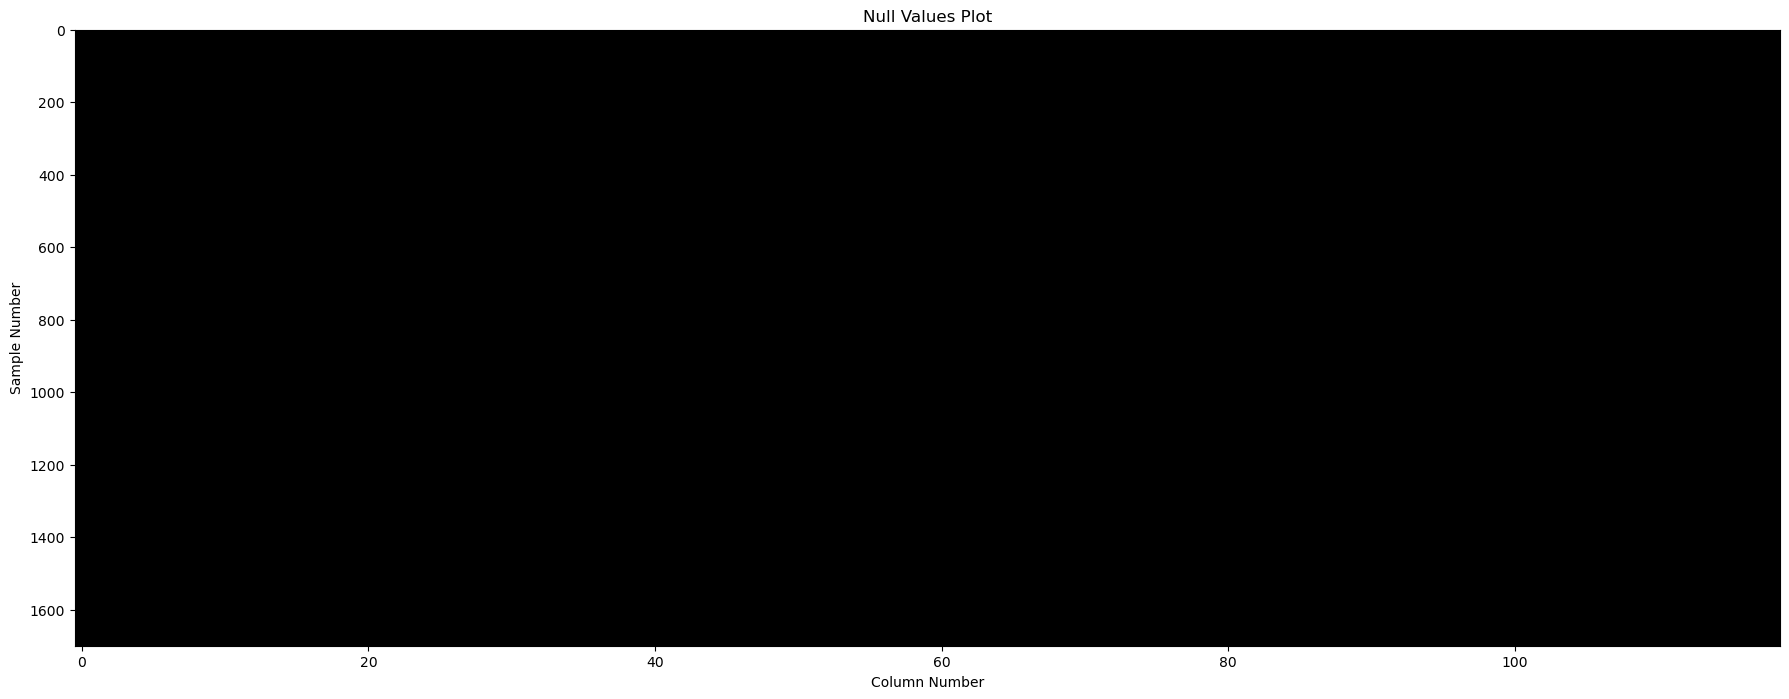

In [30]:
#Data set visualization(Null vs Values)

plt.figure(figsize=(22, 8))
plt.imshow(Data_Set_3.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title('Null Values Plot') 

### Feature Selection

### Splitting dataset



In [31]:
x = Data_Set_3.iloc[:,:-1]
y = Data_Set_3.iloc[:,-1]

In [32]:
x.head(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: LET_IS, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [35]:
# Feature selection and model evaluation
test_scores = []

for i in range(1, x.shape[1] + 1):
    # Feature selection
    selected_features = SelectKBest(score_func=chi2, k=i).fit(x, y)
    X_selected = selected_features.transform(x)
    
    # Standardize features
    X_standardized = StandardScaler().fit_transform(X_selected)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.25, random_state=42)
    
    # Train a Decision Tree classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate and store test score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_scores.append(accuracy)
    
    print(f"Test score for model with {i} columns: {accuracy * 100:.2f}%")

Test score for model with 1 columns: 87.29%
Test score for model with 2 columns: 88.94%
Test score for model with 3 columns: 89.41%
Test score for model with 4 columns: 90.59%
Test score for model with 5 columns: 89.88%
Test score for model with 6 columns: 88.24%
Test score for model with 7 columns: 89.18%
Test score for model with 8 columns: 89.65%
Test score for model with 9 columns: 89.88%
Test score for model with 10 columns: 90.35%
Test score for model with 11 columns: 90.35%
Test score for model with 12 columns: 90.35%
Test score for model with 13 columns: 90.12%
Test score for model with 14 columns: 90.12%
Test score for model with 15 columns: 90.59%
Test score for model with 16 columns: 90.35%
Test score for model with 17 columns: 90.35%
Test score for model with 18 columns: 90.82%
Test score for model with 19 columns: 90.35%
Test score for model with 20 columns: 90.35%
Test score for model with 21 columns: 90.59%
Test score for model with 22 columns: 90.35%
Test score for mode

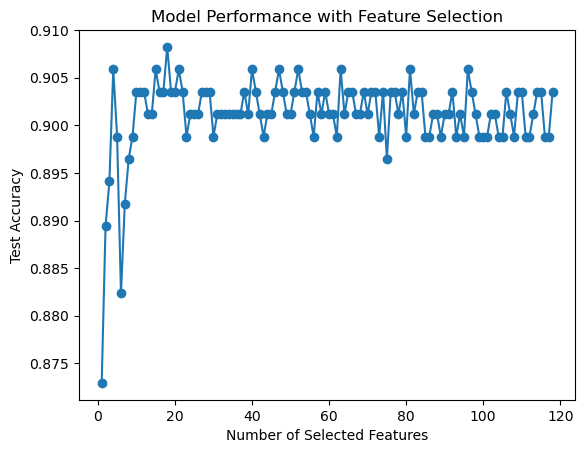

In [36]:
# Plot the results if needed
import matplotlib.pyplot as plt

plt.plot(range(1, x.shape[1] + 1), test_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Test Accuracy')
plt.title('Model Performance with Feature Selection')
plt.show()

In [37]:
# maximum score obtained

max(test_scores)

0.908235294117647

In [38]:
# Find the index of the maximum test score
max_score_index = test_scores.index(max(test_scores))

# Retrieve the corresponding value of 'k' (number of selected features)
best_k = max_score_index

# Retrieve the maximum test score itself
best_score = test_scores[max_score_index]

# Print the results
print("Best test score:", best_score)
print("Corresponding 'k' (number of selected features):", best_k+1)

Best test score: 0.908235294117647
Corresponding 'k' (number of selected features): 18


#### ** From SelectKBest technique we can conclude that model with only top 18 best columns is giving maximum accuracy.

# 

In [39]:
new_x = SelectKBest(score_func=chi2,k=18).fit(x,y)
index = new_x.get_support(indices = True)
topk_mi = x[x.columns[index]]
topk_mi = pd.concat([topk_mi,y],axis=1)
topk_mi

,AGE,STENOK_AN,ZSN_A,S_AD_ORIT,D_AD_ORIT,K_SH_POST,ant_im,n_p_ecg_p_12,ROE,TIME_B_S,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_2_n,FIBR_JELUD,OTEK_LANC,RAZRIV,ZSN,LET_IS
0,77.0,1.0,0.0,180.0,100.0,0.0,1.0,0.0,16.0,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0
1,55.0,0.0,0.0,120.0,90.0,0.0,4.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,52.0,0.0,0.0,180.0,100.0,0.0,4.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,68.0,0.0,1.0,120.0,70.0,0.0,0.0,0.0,10.0,2.0,0.0,1.0,0.0,0.0,0,0,0,1,0
4,60.0,0.0,0.0,160.0,90.0,0.0,4.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,4.0,0.0,110.0,70.0,0.0,2.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0,0,1,0,3
1696,70.0,6.0,0.0,50.0,0.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0,1
1697,55.0,6.0,0.0,70.0,50.0,0.5,4.0,0.0,13.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,6
1698,79.0,2.0,2.0,110.0,70.0,0.0,2.0,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0,1,0,0,1


In [67]:
topk_mi.describe()

,AGE,STENOK_AN,ZSN_A,S_AD_ORIT,D_AD_ORIT,K_SH_POST,ant_im,n_p_ecg_p_12,ROE,TIME_B_S,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_2_n,FIBR_JELUD,OTEK_LANC,RAZRIV,ZSN,LET_IS
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.869412,2.341765,0.208529,133.867647,82.317647,0.027353,1.585294,0.045882,13.033529,4.633529,0.157647,0.071765,0.115294,0.110294,0.041765,0.093529,0.031765,0.231765,0.477059
std,11.263394,2.406999,0.675320,28.828359,16.849723,0.162706,1.692453,0.209291,10.658736,2.768345,0.445720,0.302282,0.319010,0.384250,0.200110,0.291259,0.175425,0.422084,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,120.000000,80.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,2.000000,0.000000,130.000000,80.000000,0.000000,1.000000,0.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,5.000000,0.000000,150.000000,90.000000,0.000000,4.000000,0.000000,17.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,6.000000,4.000000,260.000000,190.000000,1.000000,4.000000,1.000000,140.000000,9.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Data Visualization

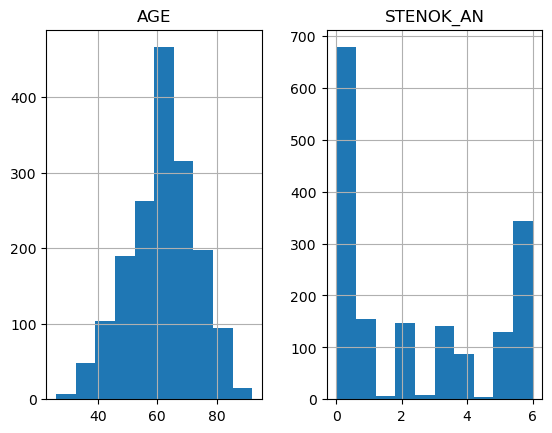

In [68]:
topk_mi.iloc[:,:2].hist()
plt.show()

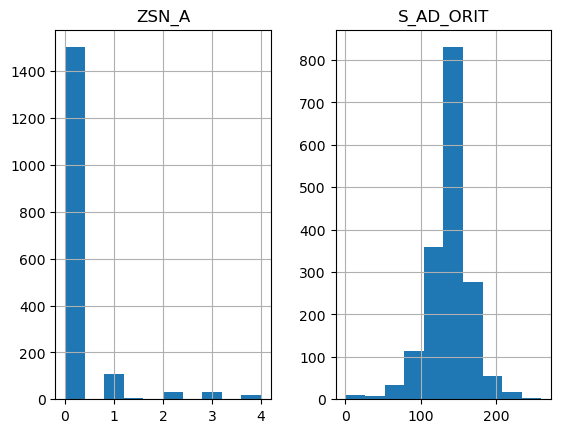

In [69]:
topk_mi.iloc[:,2:4].hist()
plt.show()

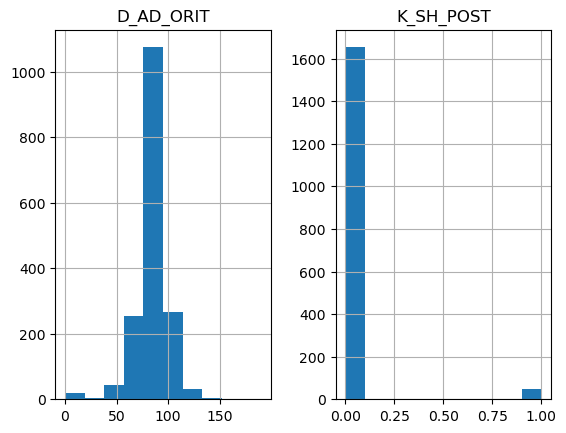

In [70]:
topk_mi.iloc[:,4:6].hist()
plt.show()

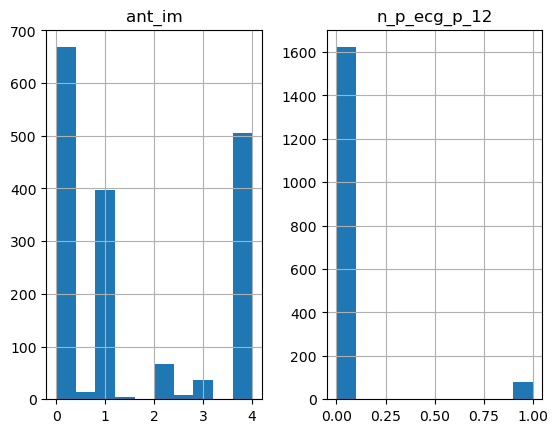

In [71]:
topk_mi.iloc[:,6:8].hist()
plt.show()

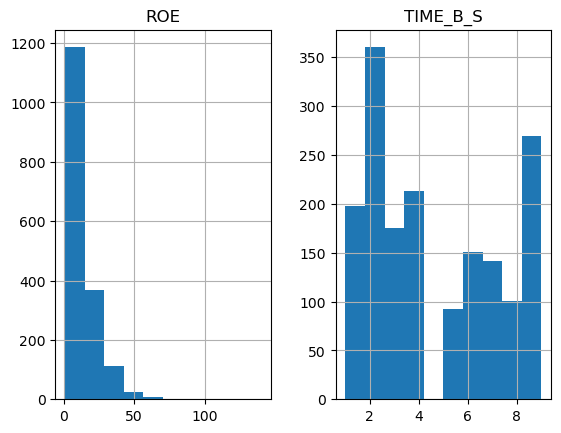

In [72]:
topk_mi.iloc[:,8:10].hist()
plt.show()

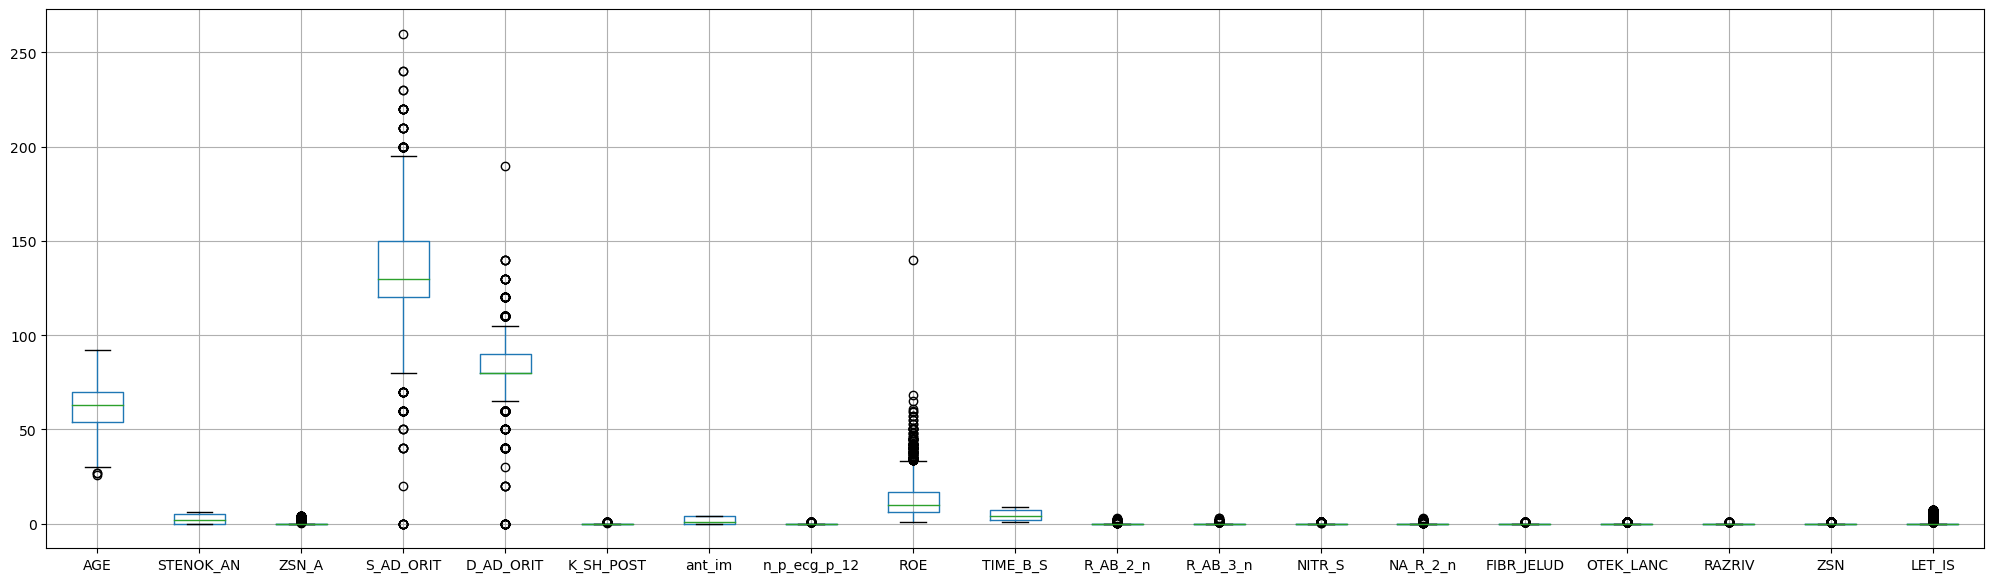

In [73]:
# checking for outliers

plt.figure(figsize=(25,7))
topk_mi.boxplot()
plt.show()

In [74]:
# significant amount of outliers are present in dataset. Therefore removal of outlier can cause loss of information.

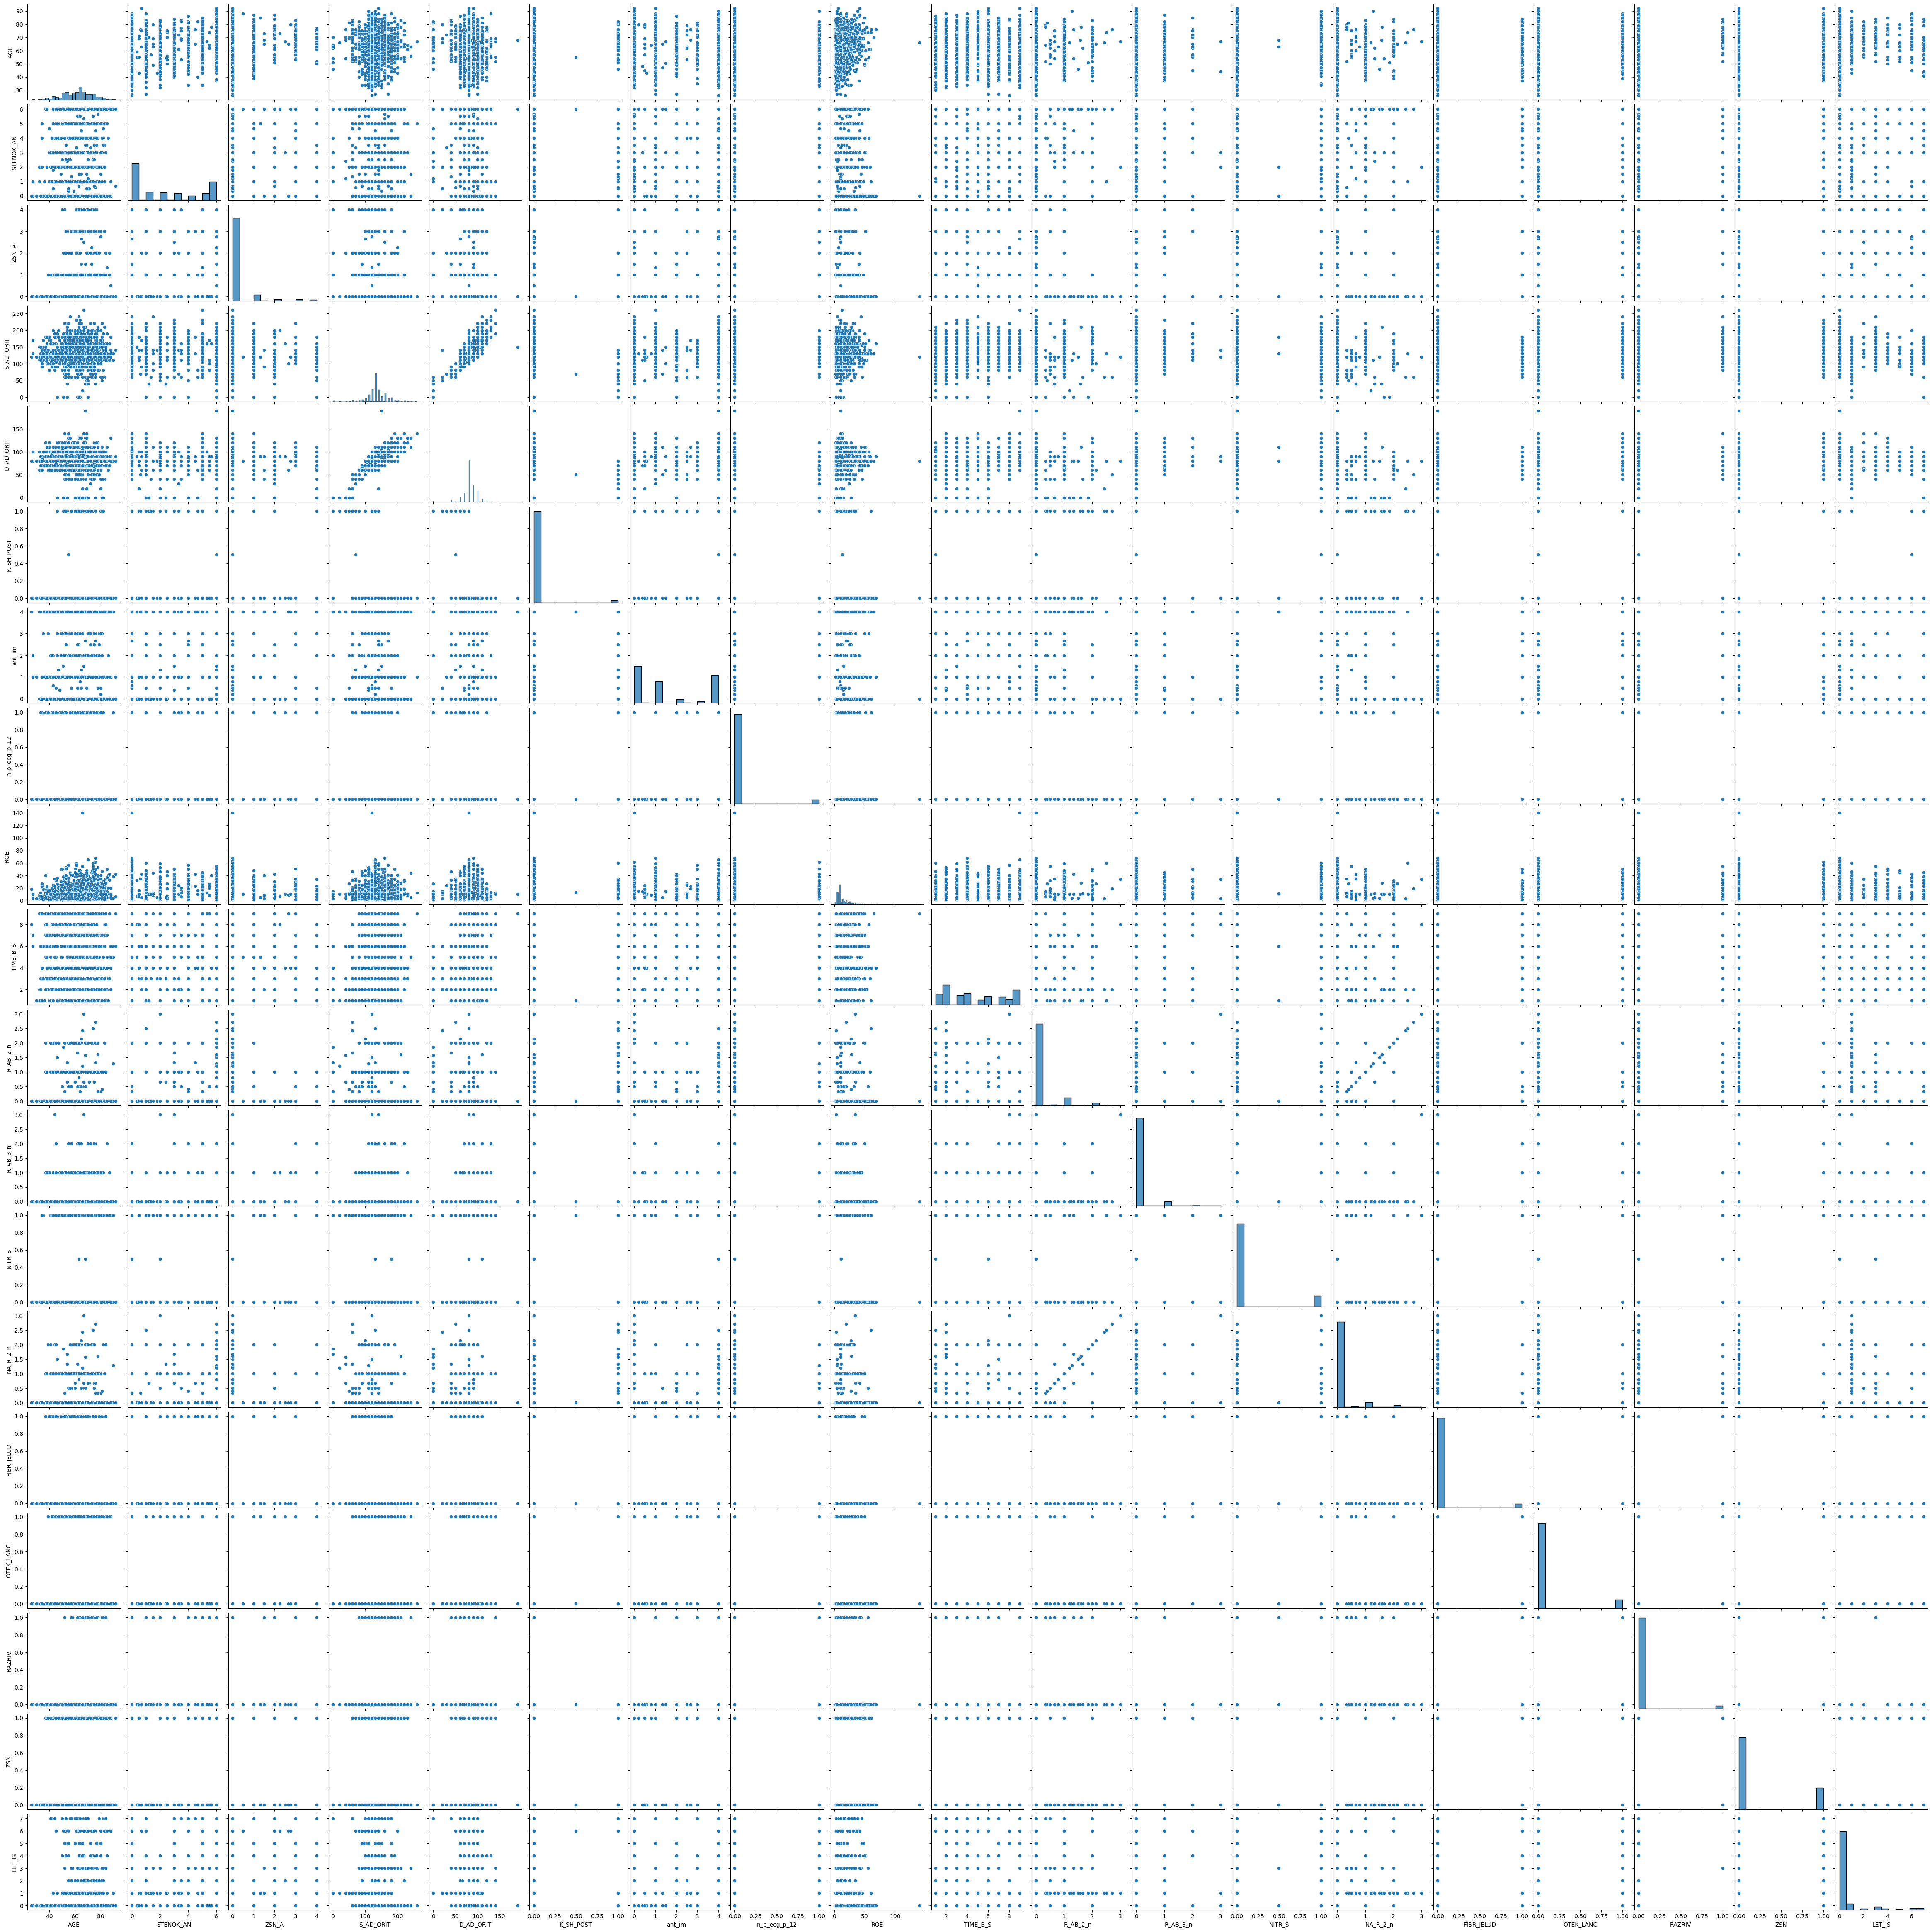

In [75]:
sns.pairplot(topk_mi)
plt.show()

#### ** From above every data visualization we can conclude that dataset is highly imbalanced. Which we can cure by applying SMOTE.

# 

# Model Building and Evaluation

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

In [77]:
# splitting of dataset

x = topk_mi.iloc[:,:-1]
y = topk_mi.iloc[:,-1:]


# Applying SMOTE() function to balanced imbalanced dataset.

smt = SMOTE()
x_smt, y_smt = smt.fit_resample(x, y)


# standardizing data

x_stand = StandardScaler().fit_transform(x_smt)

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x_stand,y_smt,test_size=0.3,random_state=42)

In [79]:
from xgboost import XGBClassifier

XGBOOST
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9871720116618076
train score  1.0

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[417   4   0   0   3   3   2   1]
 [ 11 411   0   0   0   0   1   2]
 [  4   0 450   0   0   0   0   0]
 [  0   0   0 442   0   0   0   0]
 [  3   0   0   0 406   0   0   0]
 [  0   0   0   0   0 421   0   0]
 [  5   0   0   0   0   2 440   0]
 [  0   1   2   0   0   0   0 399]]


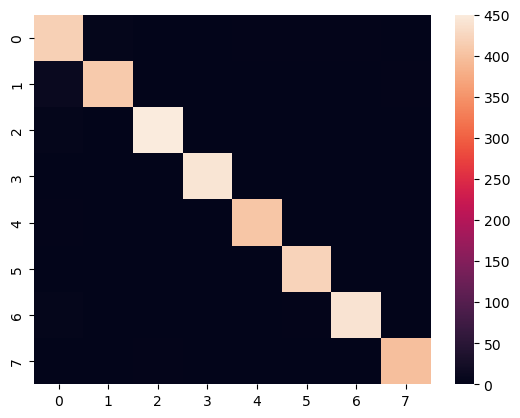


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       430
           1       0.99      0.97      0.98       425
           2       1.00      0.99      0.99       454
           3       1.00      1.00      1.00       442
           4       0.99      0.99      0.99       409
           5       0.99      1.00      0.99       421
           6       0.99      0.98      0.99       447
           7       0.99      0.99      0.99       402

    accuracy                           0.99      3430
   macro avg       0.99      0.99      0.99      3430
weighted avg       0.99      0.99      0.99      3430



In [80]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train,y_train)
y_pred = xgboost_model.predict(x_test)

print("XGBOOST")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , xgboost_model.score(x_test, y_test))
print("train score " , xgboost_model.score(x_train, y_train))
print()
if abs((xgboost_model.score(x_train, y_train))-(xgboost_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")


print()
print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

KNN
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9498542274052478
train score  0.9641339665083729

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[288  33  13   0  27  15  24  30]
 [  6 403   4   0   1   4   2   5]
 [  0   0 454   0   0   0   0   0]
 [  0   0   0 442   0   0   0   0]
 [  1   0   0   0 408   0   0   0]
 [  0   0   0   0   0 421   0   0]
 [  0   0   0   0   1   1 445   0]
 [  1   2   1   0   0   0   1 397]]


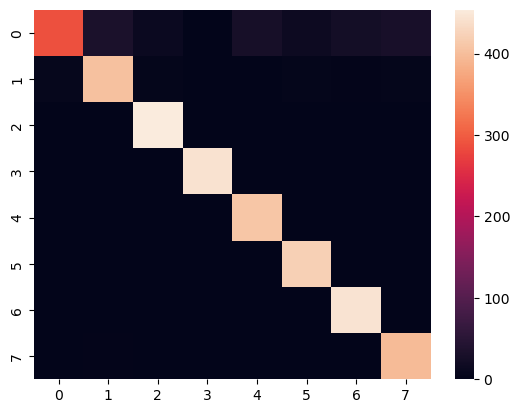


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       430
           1       0.92      0.95      0.93       425
           2       0.96      1.00      0.98       454
           3       1.00      1.00      1.00       442
           4       0.93      1.00      0.96       409
           5       0.95      1.00      0.98       421
           6       0.94      1.00      0.97       447
           7       0.92      0.99      0.95       402

    accuracy                           0.95      3430
   macro avg       0.95      0.95      0.95      3430
weighted avg       0.95      0.95      0.95      3430



In [81]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

print("KNN")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , knn_model.score(x_test, y_test))
print("train score " , knn_model.score(x_train, y_train))
print()
if abs((knn_model.score(x_train, y_train))-(knn_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [82]:
from sklearn.linear_model import LogisticRegression

Logistic Regression
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.7256559766763848
train score  0.7199450137465634

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[273  18  17   0  37  30  30  25]
 [ 40 216  42   0   0  18  41  68]
 [ 19  12 305   0   4  27  50  37]
 [  0   0   0 442   0   0   0   0]
 [ 27   0   9   0 325   3  39   6]
 [  0   2   7   0  16 380   5  11]
 [ 51  31  55   0  16  28 265   1]
 [ 41  25  27   0   0  17   9 283]]


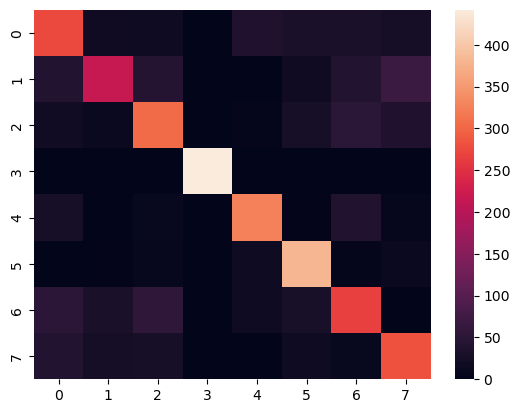


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       430
           1       0.71      0.51      0.59       425
           2       0.66      0.67      0.67       454
           3       1.00      1.00      1.00       442
           4       0.82      0.79      0.81       409
           5       0.76      0.90      0.82       421
           6       0.60      0.59      0.60       447
           7       0.66      0.70      0.68       402

    accuracy                           0.73      3430
   macro avg       0.73      0.73      0.72      3430
weighted avg       0.73      0.73      0.72      3430



In [83]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

print("Logistic Regression")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , LR_model.score(x_test, y_test))
print("train score " , LR_model.score(x_train, y_train))
print()
if abs((LR_model.score(x_train, y_train))-(LR_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [84]:
from sklearn.svm import SVC

Support Vector Machine
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9396501457725948
train score  0.955261184703824

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[336  19   8   0  20   9  26  12]
 [ 22 359   3   0   1   5  19  16]
 [  1   0 452   0   0   0   1   0]
 [  0   0   0 442   0   0   0   0]
 [  4   0   0   0 397   1   7   0]
 [  0   0   0   0   0 421   0   0]
 [ 11   0   0   0   0   2 434   0]
 [ 12   2   1   0   0   0   5 382]]


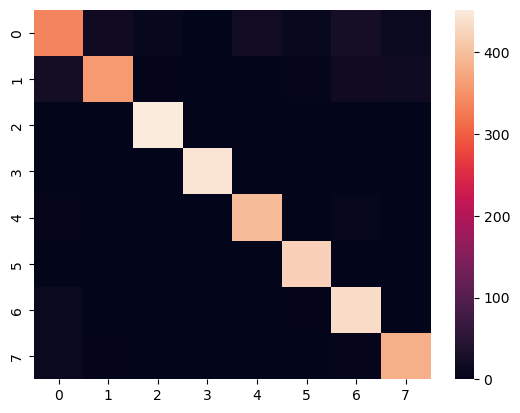


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       430
           1       0.94      0.84      0.89       425
           2       0.97      1.00      0.98       454
           3       1.00      1.00      1.00       442
           4       0.95      0.97      0.96       409
           5       0.96      1.00      0.98       421
           6       0.88      0.97      0.92       447
           7       0.93      0.95      0.94       402

    accuracy                           0.94      3430
   macro avg       0.94      0.94      0.94      3430
weighted avg       0.94      0.94      0.94      3430



In [85]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Support Vector Machine")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , svm_model.score(x_test, y_test))
print("train score " , svm_model.score(x_train, y_train))
print()
if abs((svm_model.score(x_train, y_train))-(svm_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

In [86]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Classifier
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9833819241982508
train score  1.0

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[407   9   0   0   3   5   2   4]
 [ 11 408   3   0   0   0   1   2]
 [  3   0 451   0   0   0   0   0]
 [  0   0   0 442   0   0   0   0]
 [  1   0   0   0 408   0   0   0]
 [  1   0   0   0   0 420   0   0]
 [  5   0   0   0   0   2 440   0]
 [  1   0   4   0   0   0   0 397]]


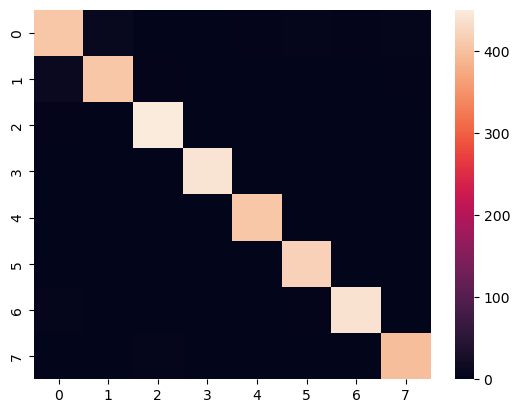


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       430
           1       0.98      0.96      0.97       425
           2       0.98      0.99      0.99       454
           3       1.00      1.00      1.00       442
           4       0.99      1.00      1.00       409
           5       0.98      1.00      0.99       421
           6       0.99      0.98      0.99       447
           7       0.99      0.99      0.99       402

    accuracy                           0.98      3430
   macro avg       0.98      0.98      0.98      3430
weighted avg       0.98      0.98      0.98      3430



In [87]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

print("Random Forest Classifier")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , rf_model.score(x_test, y_test))
print("train score " , rf_model.score(x_train, y_train))
print()
if abs((rf_model.score(x_train, y_train))-(rf_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [88]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.9521865889212828
train score  1.0

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[371  20   4   0   9   8   5  13]
 [ 14 391   4   0   0   1   6   9]
 [  5   1 438   0   3   1   1   5]
 [  0   0   0 442   0   0   0   0]
 [  8   2   1   0 395   0   3   0]
 [  5   0   1   0   0 414   1   0]
 [ 12   3   1   0   1   0 428   2]
 [  3   6   1   0   2   2   1 387]]


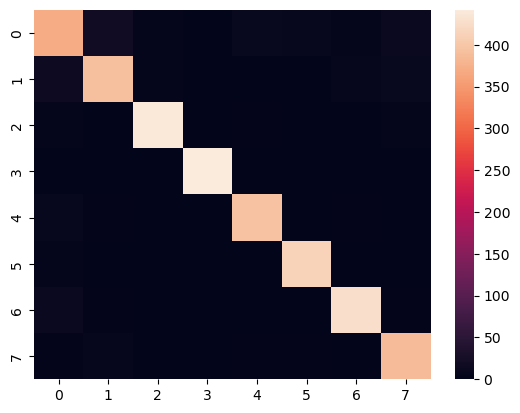


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       430
           1       0.92      0.92      0.92       425
           2       0.97      0.96      0.97       454
           3       1.00      1.00      1.00       442
           4       0.96      0.97      0.96       409
           5       0.97      0.98      0.98       421
           6       0.96      0.96      0.96       447
           7       0.93      0.96      0.95       402

    accuracy                           0.95      3430
   macro avg       0.95      0.95      0.95      3430
weighted avg       0.95      0.95      0.95      3430



In [89]:
decisiontree_model = DecisionTreeClassifier(criterion="gini")
decisiontree_model.fit(x_train,y_train)
y_pred = decisiontree_model.predict(x_test)

print("Decision Tree")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , decisiontree_model.score(x_test, y_test))
print("train score " , decisiontree_model.score(x_train, y_train))
print()
if abs((decisiontree_model.score(x_train, y_train))-(decisiontree_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

Naive Bayes
-------------------------------------------------------

Scores
-------------------------------------------------------
test score  0.4752186588921283
train score  0.46575856035991003

Overfiting or underfitting doesn't exist

Confusion matrix
-------------------------------------------------------
[[  7   2  52   0  10 340   9  10]
 [  0 136 105   0   0 128  38  18]
 [  0   0 355   0   0  97   1   1]
 [  0   0   0 442   0   0   0   0]
 [  0   0 116   0 112 181   0   0]
 [  0   0   0   0   0 421   0   0]
 [  0  14 189   0   0 209  27   8]
 [  1  14  63   0   0 180  14 130]]


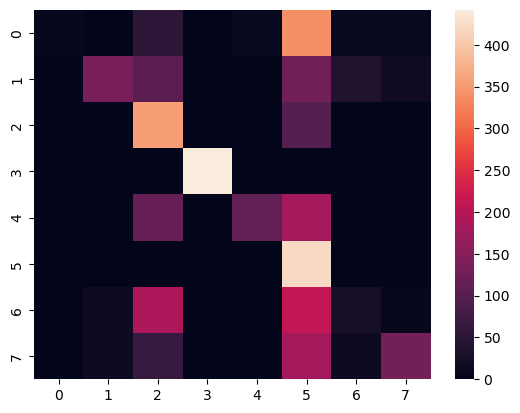


Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.02      0.03       430
           1       0.82      0.32      0.46       425
           2       0.40      0.78      0.53       454
           3       1.00      1.00      1.00       442
           4       0.92      0.27      0.42       409
           5       0.27      1.00      0.43       421
           6       0.30      0.06      0.10       447
           7       0.78      0.32      0.46       402

    accuracy                           0.48      3430
   macro avg       0.67      0.47      0.43      3430
weighted avg       0.67      0.48      0.43      3430



In [91]:
gb_model = GaussianNB()
gb_model.fit(x_train,y_train)
y_pred = gb_model.predict(x_test)

print("Naive Bayes")
print('-------------------------------------------------------')
print()

print("Scores")
print('-------------------------------------------------------')
print("test score " , gb_model.score(x_test, y_test))
print("train score " , gb_model.score(x_train, y_train))
print()
if abs((gb_model.score(x_train, y_train))-(gb_model.score(x_test, y_test))) > 15:
    print("Overfiting or underfitting exist")
else:
    print("Overfiting or underfitting doesn't exist")

print()

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.show()

print()
print('Classification Report')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

# 

### XGBOOST (Extreme Gradient Boosting) preforming very good compare to other classification models with 97.2% accuracy.

In [92]:
import joblib

In [93]:
joblib.dump(xgboost_model,"xgboostmodel1.pkl")

['xgboostmodel1.pkl']

# 

# 